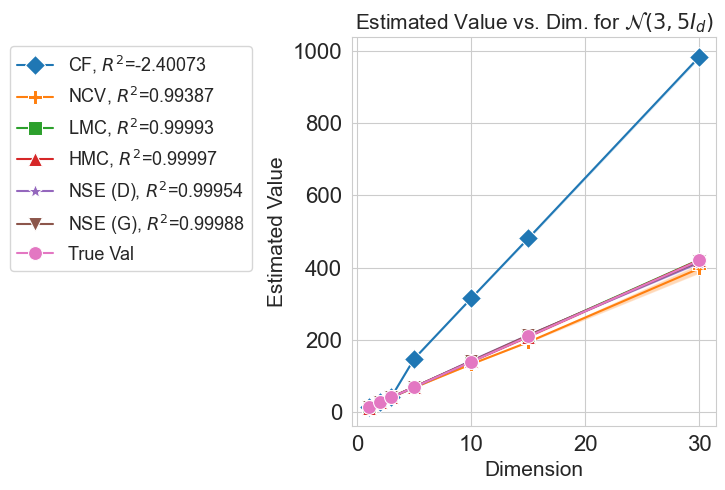

In [4]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style('whitegrid')

HOME = "experiments/MVN_results/"
NAMES_AND_MARKERS = {"Langevin": ("LMC",'s'), "HMC": ("HMC",'^'), "CF": ("CF",'D'), "NCV": ("NCV",'P'), 
         "NSE_diff": ("NSE (D)", '*'), "NSE_grad": ("NSE (G)",'v')}

def compute_Rsquared(y_true, y_pred):
    y_true = y_true.to_numpy()
    y_pred = y_pred.to_numpy()
    ss_total = sum((y_true - sum(y_true) / len(y_true)) ** 2)
    ss_res = sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_res / ss_total)
    return r2

# Load the data
df = pd.read_csv(HOME + 'enhanced_merged_MVN_results.csv')

# Calculate the means and standard deviations
means = df.groupby(['dim']).mean().reset_index()
stds = df.groupby(['dim']).std().reset_index()
# means.to_csv(HOME + 'means.csv')
# stds.to_csv(HOME + 'stds.csv')
# print(means)
# print(stds)
# Calculate the R^2 values
Rsquared = {}
for method in ['Langevin', 'HMC', 'NSE_diff', 'NSE_grad', 'CF',  'NCV']:
    Rsquared[method] = compute_Rsquared(means['true_val'], means[method])

# Plot the data
plt.figure(figsize=(8, 5))
legend=True
for i, method in enumerate([
                            'CF', 
                            # 'CF_on',
                            'NCV',
                            # 'NCV_on',
                            'Langevin', 'HMC',  
                            'NSE_diff', 'NSE_grad',]):
    n, m = NAMES_AND_MARKERS[method]
    sns.lineplot(data=means, x='dim', y=method, label=n + fr", $R^2$={Rsquared[method]:.5f}", marker=m, markersize=10, legend=legend)
    plt.fill_between(means['dim'], means[method] - stds[method], means[method] + stds[method], alpha=0.3)
sns.lineplot(data=means, x='dim', y='true_val', label='True Val', marker='o', markersize=10, legend=legend)
# sns.lineplot(data=means, x='dim', y=method, label=NAMES[method] + fr", $R^2$={Rsquared[method]:.5f}", marker=markers[i], markersize=10)


# for i, method in enumerate(['Langevin', 'HMC', 'stein_est_diff', 'stein_est_grad', 'CF', 'CF_on', 'NCV', 'NCV_on']):
#     sns.lineplot(data=means, x='dim', y=method, label=method + fr", $R^2$={Rsquared[method]:.5f}", marker=markers[i])

fontsize=15
plt.xlabel('Dimension', fontsize=fontsize)
plt.ylabel('Estimated Value', fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tick_params(axis='both', which='minor', labelsize=16)
plt.legend(fontsize=16)
# plt.legend()
# plt.legend(loc='right')
plt.legend(loc='upper right', bbox_to_anchor=(-0.25, 1),
          fontsize=fontsize-2
          )
plt.title(r'Estimated Value vs. Dim. for $\mathcal{N}(3, 5I_d)$', fontsize=fontsize)
plt.tight_layout()
plt.savefig(HOME + 'MVN_estimated_value_vs_dimension_zdh.pdf')

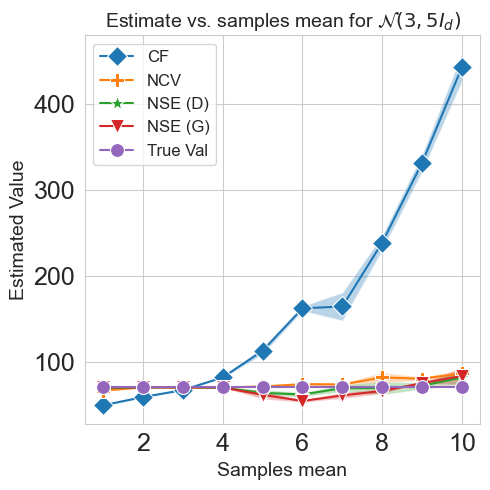

In [6]:
HOME = "experiments/mean_MVN_results/"


# Load the data
df = pd.read_csv(HOME + 'final_merged_mMVN_results.csv')

# Calculate the means and standard deviations
means = df.groupby(['used_mean']).mean().reset_index()
stds = df.groupby(['used_mean']).std().reset_index()
# means.to_csv(HOME + 'mMVN_means.csv')
# stds.to_csv(HOME + 'mMVN_stds.csv')
# print(means)
# print(stds)

# Plot the data
plt.figure(figsize=(5, 5))

# plot with confidence intervals
for i, method in enumerate(['CF', 'NCV', 'NSE_diff', 'NSE_grad', ]):
    n, m = NAMES_AND_MARKERS[method]
    sns.lineplot(data=means, x='used_mean', y=method, label=n, marker=m, markersize=10)
    plt.fill_between(means['used_mean'], means[method] - stds[method], means[method] + stds[method], alpha=0.3)

sns.lineplot(data=means, x='used_mean', y='true_val', label='True Val', marker='o', markersize=10)
# for i, method in enumerate(['Langevin', 'HMC', 'stein_est_diff', 'stein_est_grad', 'CF', 'CF_on', 'NCV', 'NCV_on']):
#     sns.lineplot(data=means, x='dim', y=method, label=method + fr", $R^2$={Rsquared[method]:.5f}", marker=markers[i])

fontsize=14
plt.xlabel('Samples mean', fontsize=fontsize)
plt.ylabel('Estimated Value', fontsize=fontsize)
# increasing the font size
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=18)
plt.legend(fontsize=fontsize-2)
# plt.legend()
plt.title(r'Estimate vs. samples mean for $\mathcal{N}(3, 5I_d)$', fontsize=fontsize)
plt.tight_layout()
plt.savefig(HOME + 'MVN_estimated_value_vs_mean_zdh.pdf')
plt.show()

In [7]:
HOME = "experiments/GMM_results/"

# Load the data
df = pd.read_csv(HOME + 'enhanced_merged_GMM_results.csv')

# Calculate the means and standard deviations
means = df.groupby(['dim']).mean().reset_index()
stds = df.groupby(['dim']).std().reset_index()
# means.to_csv(HOME + 'means.csv')
# stds.to_csv(HOME + 'stds.csv')
# print(means)
# print(stds)

# Plot the data
plt.figure(figsize=(5, 5))
# plot with confidence intervals


for i, method in enumerate(['Langevin', 'HMC', 'CF', 'NCV', 'NSE_diff', 'NSE_grad',]):
    n, m = NAMES_AND_MARKERS[method]
    sns.lineplot(data=means, x='dim', y=method, label=n, marker=m, markersize=10)
    plt.fill_between(means['dim'], means[method] - stds[method], means[method] + stds[method], alpha=0.3)

sns.lineplot(data=means, x='dim', y='true_val', label='True Val', marker='o', markersize=10)
# for i, method in enumerate(['Langevin', 'HMC', 'stein_est_diff', 'stein_est_grad', 'CF', 'CF_on', 'NCV', 'NCV_on']):
#     sns.lineplot(data=means, x='dim', y=method, label=method + fr", $R^2$={Rsquared[method]:.5f}", marker=markers[i])

fontsize=14
plt.xlabel('Dimension', fontsize=fontsize)
plt.ylabel('Estimated Value', fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=18)
plt.legend(fontsize=fontsize-2)
plt.legend(loc='upper left')
plt.title(r'Estimated Value vs. Dimension for MoG')
plt.savefig(HOME + 'GMM_estimated_value_vs_dimension_zdh.pdf')

NameError: name 'NAMES' is not defined

<Figure size 500x500 with 0 Axes>